In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
image_size = [224, 224] # Size which is used by transfer learning algorithms

train_path = '/content/drive/MyDrive/Cotton-Disease-Prediction/Datasets/train/'
test_path = '/content/drive/MyDrive/Cotton-Disease-Prediction/Datasets/test/'


In [ ]:
resnet = ResNet50(input_shape = image_size + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# Don't train existing weights:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
# Glob: Useful for getting the total number of output classes:
folders = glob('/content/drive/MyDrive/Cotton-Disease-Prediction/Datasets/train/*')

In [ ]:
len(folders)

4

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating a model object:
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [ ]:
# Using Image Data Generator for augmenting images:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton-Disease-Prediction/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton-Disease-Prediction/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# Fitting the model:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 626s 10s/step - loss: 3.0127 - accuracy: 0.3721 - val_loss: 1.8804 - val_accuracy: 0.3333
Epoch 2/20
61/61 [==============================] - 33s 539ms/step - loss: 1.1826 - accuracy: 0.5525 - val_loss: 1.3558 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 33s 539ms/step - loss: 0.8612 - accuracy: 0.6463 - val_loss: 0.9762 - val_accuracy: 0.5556
Epoch 4/20
61/61 [==============================] - 33s 539ms/step - loss: 1.1863 - accuracy: 0.5859 - val_loss: 1.0374 - val_accuracy: 0.7778
Epoch 5/20
61/61 [==============================] - 33s 535ms/step - loss: 0.8778 - accuracy: 0.6386 - val_loss: 1.1672 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 33s 540ms/step - loss: 0.8936 - accuracy: 0.6581 - val_loss: 0.9405 - val_accuracy: 0.7222
Epoch 7/20
61/61 [==============================] - 33s 537ms/step - loss: 0.7814 - accuracy: 0.6976 - val_loss: 0.9202 - val_accuracy: 0.6667


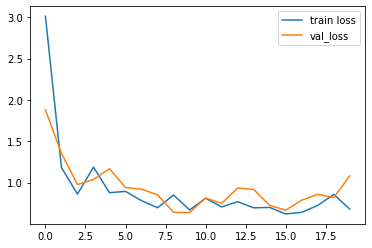

In [ ]:
# Plotting the losses:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

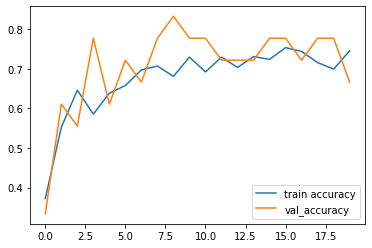

In [ ]:
# Plotting the accuracies:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
# Saving the model:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Cotton-Disease-Prediction/Models/modelResNet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
